In [86]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [87]:
import os, sys
os.getcwd()

'd:\\Kifya\\Week_0\\notebooks'

In [88]:
import sys
sys.path.append('../scripts')

from load_data import load_csv_files

# List of CSV file paths
file_paths = [
    '../data/benin-malanville.csv',
    '../data/sierraleone-bumbuna.csv',
    '../data/togo-dapaong_qc.csv'
]

# Load datasets
datasets = load_csv_files(file_paths)

benin-malanville.csv loaded successfully with shape (525600, 19).
sierraleone-bumbuna.csv loaded successfully with shape (525600, 19).
togo-dapaong_qc.csv loaded successfully with shape (525600, 19).


In [89]:
# Accessing the first dataset
data = datasets['benin-malanville.csv']
data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [90]:
# Check the type and columns
print(type(data)) # Should be DataFrame
#print(data.columns) # List all columns

<class 'pandas.core.frame.DataFrame'>


In [91]:
print(data.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [94]:
data.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [95]:
type(data)

pandas.core.frame.DataFrame

Data Quality Check

In [96]:
# Convert the 'Timestamp' column to datetime format for time series analysis
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Summary Statistics: Calculate mean, median, standard deviation, etc.
summary_stats = data.describe()
summary_stats

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


In [97]:
# check null value
data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [98]:
type(data)

pandas.core.frame.DataFrame

In [99]:
# Check negative value
# Convert relevant columns to numeric types
numeric_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Count of negative values in each column
negative_counts = (data[numeric_columns] < 0).sum()
print("Count of negative values in each column:")
print(negative_counts)

Count of negative values in each column:
GHI       258847
DNI       275987
DHI       259182
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


In [103]:
# Check Outlier 
Q1 = data[['ModA', 'ModB', 'WS', 'WSgust']].quantile(0.25)
Q3 = data[['ModA', 'ModB', 'WS', 'WSgust']].quantile(0.75)
IQR = Q3 - Q1

In [105]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[['ModA', 'ModB', 'WS', 'WSgust']].quantile(0.25)
Q3 = data[['ModA', 'ModB', 'WS', 'WSgust']].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Identify outliers as data points outside the IQR range
outliers = ((data[['ModA', 'ModB', 'WS', 'WSgust']] < (Q1 - 1.5 * IQR)) | 
            (data[['ModA', 'ModB', 'WS', 'WSgust']] > (Q3 + 1.5 * IQR))).sum()

outliers


ModA        98
ModB       240
WS        6717
WSgust    5368
dtype: int64

Time Series Analysis

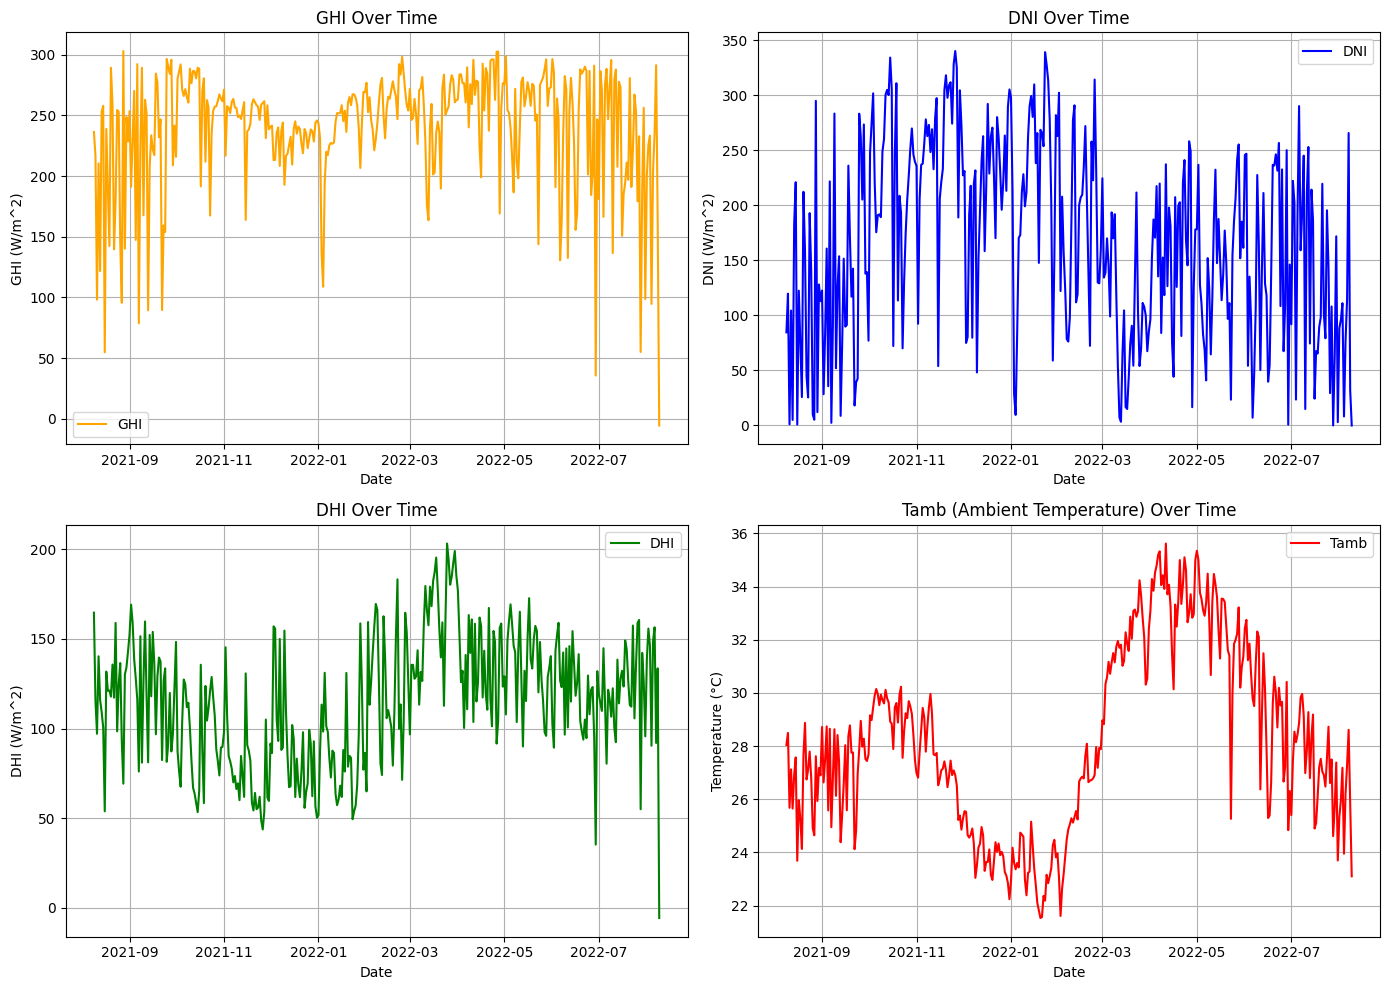

In [106]:
import matplotlib.pyplot as plt

# Set the 'Timestamp' column as the index for easier time series plotting
data.set_index('Timestamp', inplace=True)

# Resample data to daily mean for clearer visualization of trends
daily_data = data[['GHI', 'DNI', 'DHI', 'Tamb']].resample('D').mean()

# Plot line graphs for GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(14, 10))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(daily_data.index, daily_data['GHI'], color='orange', label='GHI')
plt.title('GHI Over Time')
plt.xlabel('Date')
plt.ylabel('GHI (W/m^2)')
plt.legend()
plt.grid(True)

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(daily_data.index, daily_data['DNI'], color='blue', label='DNI')
plt.title('DNI Over Time')
plt.xlabel('Date')
plt.ylabel('DNI (W/m^2)')
plt.legend()
plt.grid(True)

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(daily_data.index, daily_data['DHI'], color='green', label='DHI')
plt.title('DHI Over Time')
plt.xlabel('Date')
plt.ylabel('DHI (W/m^2)')
plt.legend()
plt.grid(True)

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(daily_data.index, daily_data['Tamb'], color='red', label='Tamb')
plt.title('Tamb (Ambient Temperature) Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Correlation Analysis

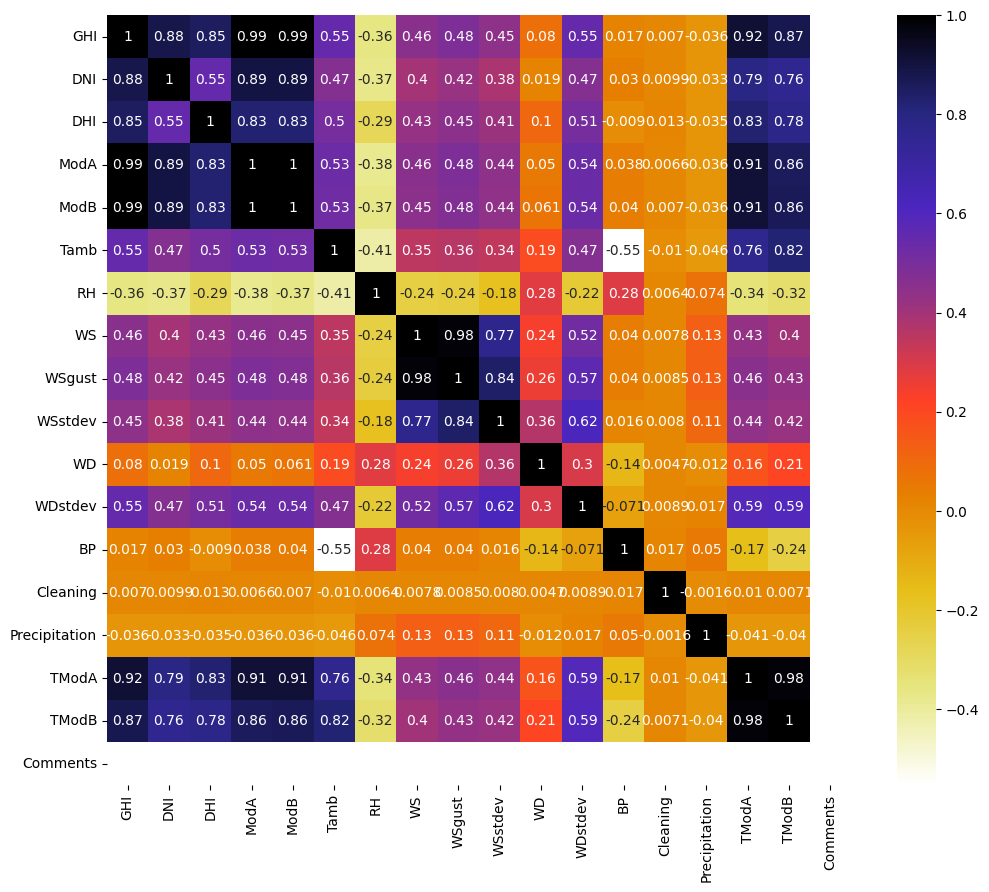

In [107]:
plt.figure(figsize=(12,10))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

Wind Analysis

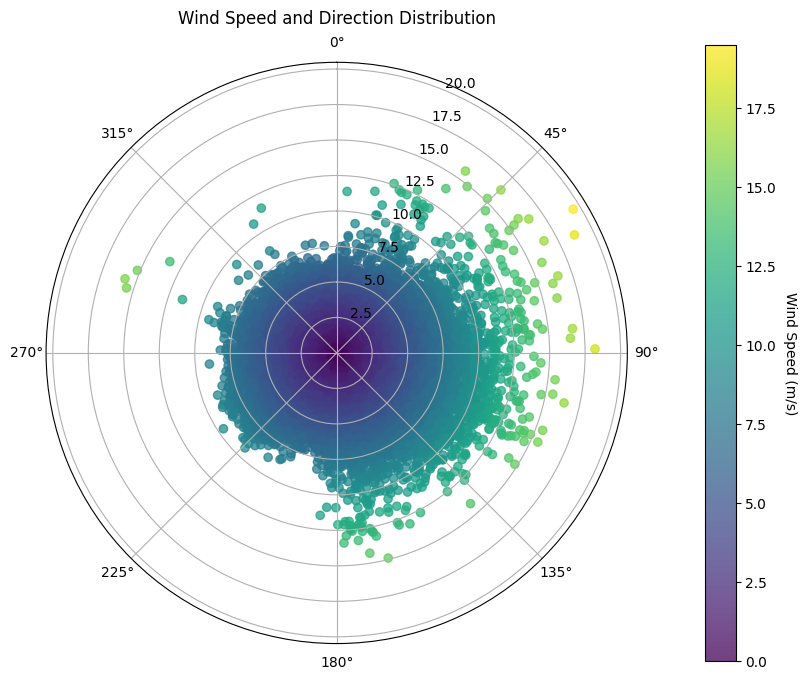

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare wind data
wind_speed = data['WS']
wind_direction = data['WD']

# Convert wind direction from degrees to radians for the polar plot
wind_direction_radians = np.deg2rad(wind_direction)

# Create the polar plot
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')
sc = ax.scatter(wind_direction_radians, wind_speed, c=wind_speed, cmap='viridis', alpha=0.75)

# Add a color bar for wind speed
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Wind Speed (m/s)', rotation=270, labelpad=15)

# Set the title and labels
ax.set_title('Wind Speed and Direction Distribution', va='bottom')
ax.set_theta_zero_location('N')  # Set 0 degrees (North) at the top
ax.set_theta_direction(-1)  # Set the direction of increasing degrees to clockwise

# Display the plot
plt.show()


In [109]:
# Correlation matrix for RH, temperature, and solar radiation
correlation_matrix = data[['RH', 'Tamb', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']].corr()
print(correlation_matrix)


             RH      Tamb     TModA     TModB       GHI       DNI       DHI
RH     1.000000 -0.414842 -0.343841 -0.319846 -0.360029 -0.373475 -0.285018
Tamb  -0.414842  1.000000  0.761701  0.823353  0.547513  0.467584  0.503925
TModA -0.343841  0.761701  1.000000  0.983443  0.920127  0.790340  0.825012
TModB -0.319846  0.823353  0.983443  1.000000  0.874338  0.756007  0.777829
GHI   -0.360029  0.547513  0.920127  0.874338  1.000000  0.882376  0.849989
DNI   -0.373475  0.467584  0.790340  0.756007  0.882376  1.000000  0.546602
DHI   -0.285018  0.503925  0.825012  0.777829  0.849989  0.546602  1.000000


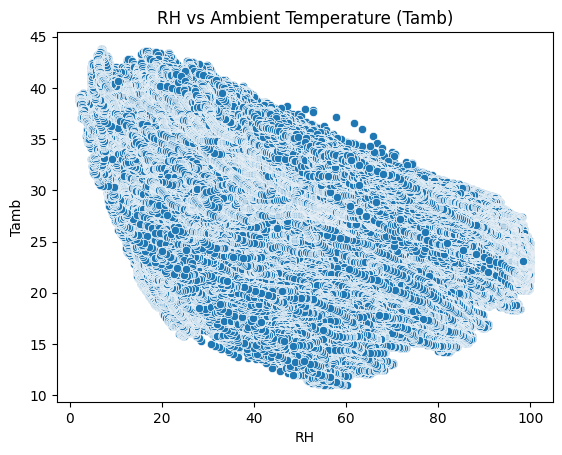

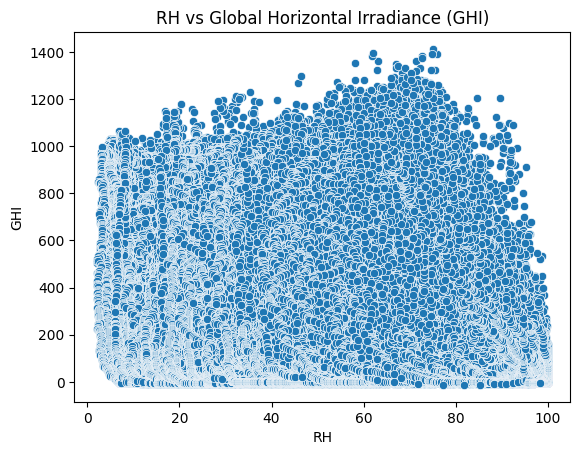

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=data)
plt.title('RH vs Ambient Temperature (Tamb)')
plt.show()

# Scatter plot: RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=data)
plt.title('RH vs Global Horizontal Irradiance (GHI)')
plt.show()


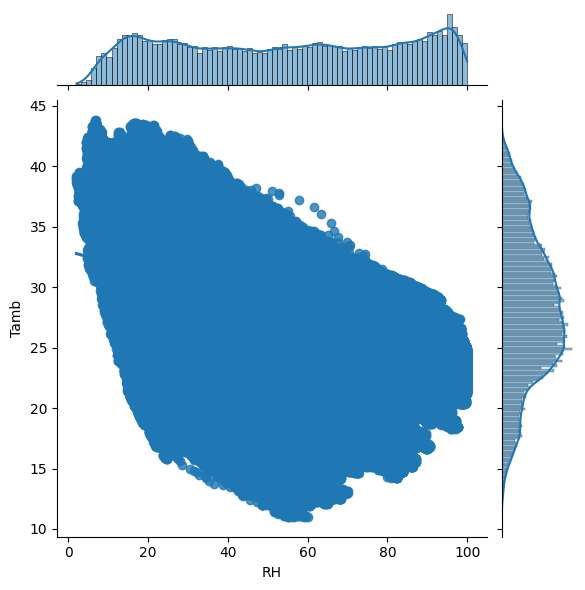

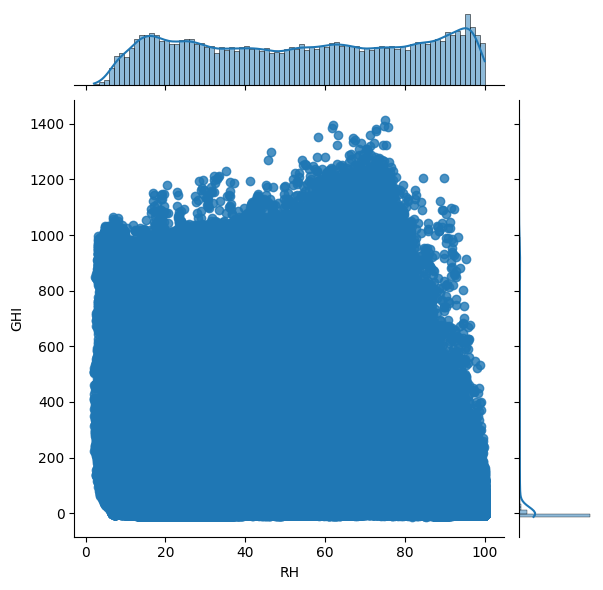

In [111]:
# Joint plot: RH vs Tamb
sns.jointplot(x='RH', y='Tamb', data=data, kind='reg')
plt.show()

# Joint plot: RH vs GHI
sns.jointplot(x='RH', y='GHI', data=data, kind='reg')
plt.show()


Feature selection and data preprocessing

In [112]:
# Checking for outliers
outliers = data[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].copy()
outliers[outliers < 0] = np.nan
outliers.describe()

,GHI,DNI,DHI,ModA,ModB,WS,WSgust
count,266753.000000,249613.000000,266418.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,476.746489,352.575567,230.808498,236.589496,228.883576,2.121113,2.809195
std,320.578541,280.657284,150.487752,326.894859,316.536515,1.603466,2.029120
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.900000,54.100000,117.900000,0.000000,0.000000,1.000000,1.300000
50%,474.200000,345.700000,213.400000,4.500000,4.300000,1.900000,2.600000
75%,771.900000,602.900000,324.200000,463.700000,447.900000,3.100000,4.100000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,19.500000,26.600000


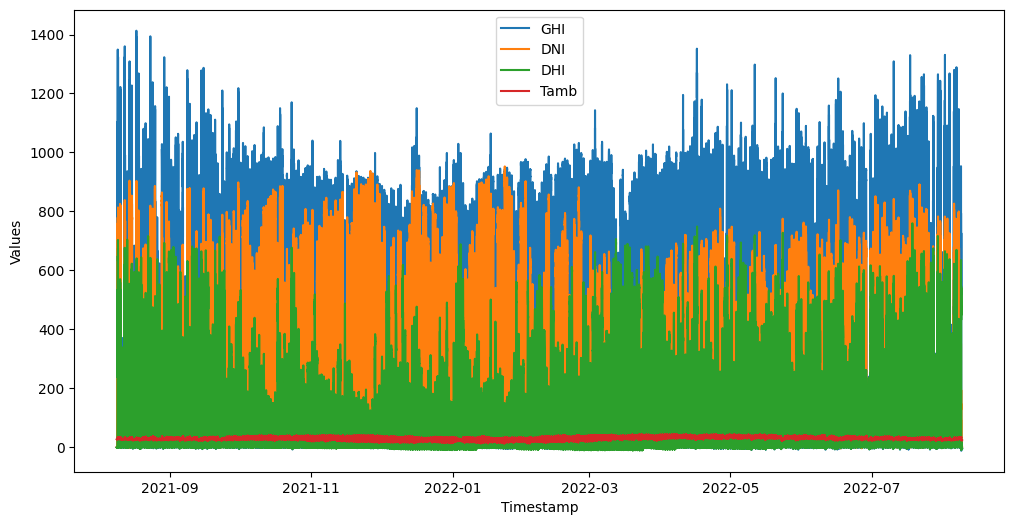

In [113]:
plt.figure(figsize=(12, 6))
plt.plot(data['GHI'], label='GHI')
plt.plot(data['DNI'], label='DNI')
plt.plot(data['DHI'], label='DHI')
plt.plot(data['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

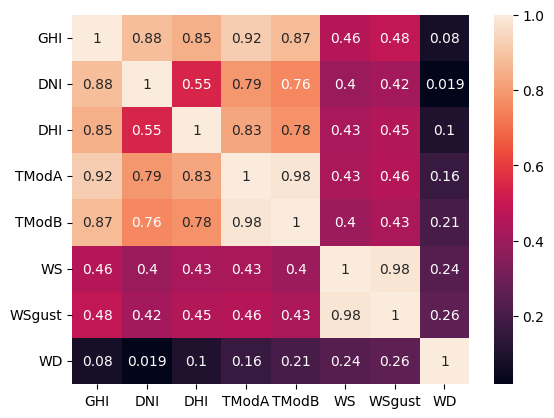

In [114]:
# Correlation Analysis
correlation = data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']].corr()
sns.heatmap(correlation, annot=True)
plt.show()

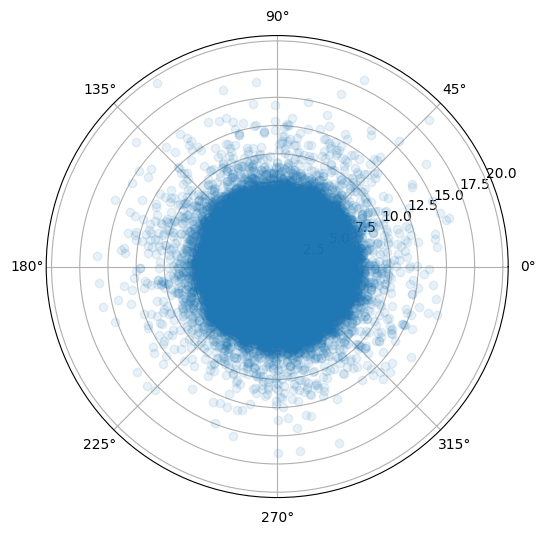

In [115]:
# Wind Analysis
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)
plt.plot(data['WD'], data['WS'], 'o', alpha=0.1)
plt.show()

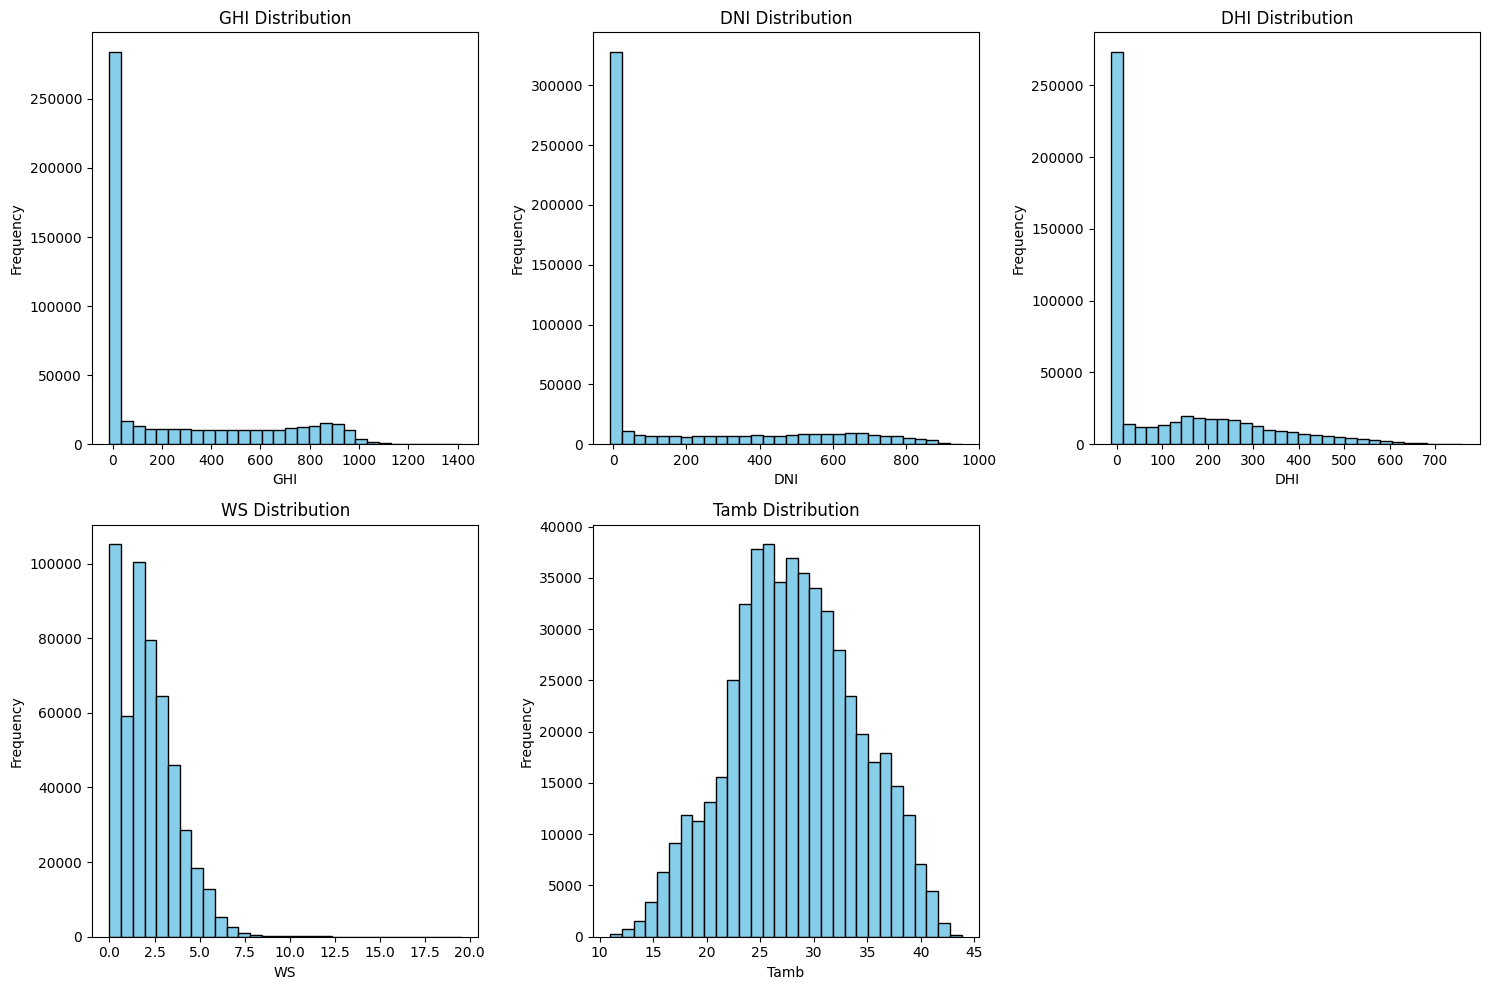

In [117]:
import matplotlib.pyplot as plt

# Define the list of variables to plot
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Set up the figure and axes
plt.figure(figsize=(15, 10))

# Loop through each variable and create a histogram
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Z-Score

In [120]:
from scipy import stats
import numpy as np

# List of variables to calculate Z-scores for
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data[variables]))

# Convert to DataFrame for easier handling
z_scores_df = pd.DataFrame(z_scores, columns=variables)

# Flag data points with Z-score > 3 (considered as outliers)
outliers = (z_scores_df > 3).any(axis=1)

# Extract the outliers
outliers_df = data[outliers]

# Display the outliers
print(outliers_df)


                        GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2  3.2   
2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4  3.4   
2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2  4.7   
2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-08-08 15:46:00     8.7   -0.2    8.6     9.0     8.8  21.7  98.7  7.0   
2022-08-08 15:48:00     8.4   -0.1    8.3     8.8     8.6  21.7  98.7  7.0   
2022-08-08 16:00:00     7.9    0.0    7.8     8.3     8.2  21.9  99.0  7.4   
2022-08-08 16:22:00     4.6   -0.1    4.6     6.1     5.9  21.9  99.0  7.1   
2022-08-08 16:32:00     4.7   -0.1    4.8     6.0     5.9  22.0 

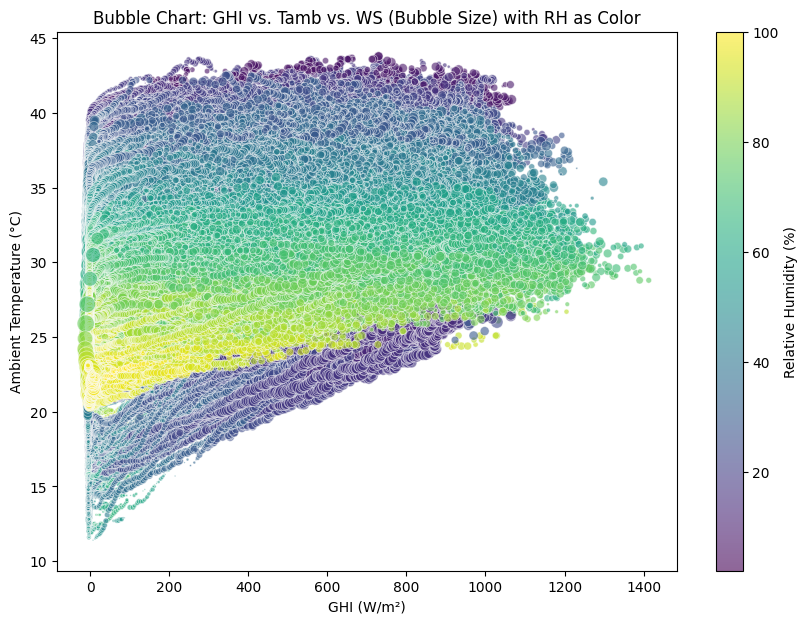

In [121]:
import matplotlib.pyplot as plt

# Define the variables for the bubble chart
x = data['GHI']         # X-axis: GHI
y = data['Tamb']        # Y-axis: Ambient Temperature (Tamb)
bubble_size = data['WS']*10  # Bubble size: Wind Speed (WS), scaled for better visibility
color = data['RH']      # Bubble color: Relative Humidity (RH)

# Create the bubble chart
plt.figure(figsize=(10, 7))
plt.scatter(x, y, s=bubble_size, c=color, cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Add labels and title
plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size) with RH as Color')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.colorbar(label='Relative Humidity (%)')  # Color bar for the RH

plt.show()


Data Cleaning

In [122]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [132]:
# Drop the "Comments" column
data_clean = data.drop('Comments', axis=1)
data=data_clean.head()
data

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


Check for negative values in the dataset and replace with zero

In [125]:
# Check for negative values in the dataset
negative_values = (data < 0).sum()
print("Columns with negative values:\n", negative_values)


Columns with negative values:
 GHI              258847
DNI              275987
DHI              259182
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments              0
dtype: int64


In [126]:
# Replace negative values with zero
data[data < 0] = 0

# Verify that there are no more negative values
negative_values_after = (data < 0).sum()
print("Columns with negative values after replacement:\n", negative_values_after)

Columns with negative values after replacement:
 GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
Comments         0
dtype: int64


In [133]:
# show result
data.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Timestamp,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
2021-08-09 00:04:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
2021-08-09 00:05:00,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


Handle Outliers

In [148]:
from scipy import stats
import numpy as np
cols_to_check = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'Tamb', 'TModA', 'TModB']
# Calculate Z-scores for selected columns
z_scores = np.abs(stats.zscore(data[cols_to_check]))

# Identify rows with Z-scores > 3 as outliers
outliers = (z_scores > 3).any(axis=1)

# Option 2: Cap outliers (using the 95th percentile as a cap)
for col in cols_to_check:
    upper_limit = data[col].quantile(0.95)
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])


C:\Users\asmam\AppData\Local\Temp\ipykernel_19916\3572837717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])
C:\Users\asmam\AppData\Local\Temp\ipykernel_19916\3572837717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])
C:\Users\asmam\AppData\Local\Temp\ipykernel_19916\3572837717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [149]:
print(data.describe())

       GHI  DNI  DHI  ModA  ModB  Tamb         RH        WS   WSgust  \
count  5.0  5.0  5.0   5.0   5.0   5.0   5.000000  5.000000  5.00000   
mean   0.0  0.0  0.0   0.0   0.0  26.2  93.460000  0.112800  0.55120   
std    0.0  0.0  0.0   0.0   0.0   0.0   0.181659  0.118403  0.36566   
min    0.0  0.0  0.0   0.0   0.0  26.2  93.300000  0.000000  0.00000   
25%    0.0  0.0  0.0   0.0   0.0  26.2  93.300000  0.000000  0.40000   
50%    0.0  0.0  0.0   0.0   0.0  26.2  93.400000  0.100000  0.70000   
75%    0.0  0.0  0.0   0.0   0.0  26.2  93.600000  0.200000  0.70000   
max    0.0  0.0  0.0   0.0   0.0  26.2  93.700000  0.264000  0.95600   

        WSstdev          WD  WDstdev          BP  Cleaning  Precipitation  \
count  5.000000    5.000000  5.00000    5.000000       5.0            5.0   
mean   0.260000   96.040000  0.76000  997.400000       0.0            0.0   
std    0.207364   53.855111  0.71624    0.547723       0.0            0.0   
min    0.000000    0.000000  0.00000  997.0